# PART A

In [117]:
#importing all the necessary mathematical, data handling & visulaization libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid")
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
import os as os

# 1. A) Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [2]:
df_car_name = pd.read_csv('Car name.csv')

In [3]:
df_car_name.shape

(398, 1)

In [4]:
df_car_name.dtypes

car_name    object
dtype: object

In [5]:
df_car_name.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [34]:
df_car_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [23]:
df_car_name.isna().sum()

car_name    0
dtype: int64

# 1. B) Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [6]:
df_car_attr = pd.read_json('Car-Attributes.json')

In [7]:
type(df_car_attr)

pandas.core.frame.DataFrame

In [8]:
os.getcwd()

'C:\\Users\\user\\Downloads'

In [9]:
 df_car_attr.to_csv('C:\\Users\\user\\Downloads\\Car-Attributes.csv')

In [10]:
df_car_attr_formatted = pd.read_csv('Car-Attributes.csv')

In [11]:
type(df_car_attr_formatted)

pandas.core.frame.DataFrame

In [12]:
df_car_attr_formatted.shape

(398, 9)

In [13]:
df_car_attr_formatted.dtypes

Unnamed: 0      int64
mpg           float64
cyl             int64
disp          float64
hp             object
wt              int64
acc           float64
yr              int64
origin          int64
dtype: object

In [14]:
df_car_attr_formatted.head()

,Unnamed: 0,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0,18.0,8,307.0,130,3504,12.0,70,1
1,1,15.0,8,350.0,165,3693,11.5,70,1
2,2,18.0,8,318.0,150,3436,11.0,70,1
3,3,16.0,8,304.0,150,3433,12.0,70,1
4,4,17.0,8,302.0,140,3449,10.5,70,1


In [15]:
df_car_attr_formatted.drop(labels= ['Unnamed: 0'], axis=1, inplace= True)

In [16]:
df_car_attr_formatted.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [24]:
df_car_attr_formatted.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

# 1. C) Merge both the DataFrames together to form a single DataFrame

In [17]:
df_car_attr_formatted['car_name'] = df_car_name   # Adding common column to car attr dataframe in order to further merge both dataframes

In [18]:
print(df_car_attr_formatted.shape)
print(df_car_name.shape)

(398, 9)
(398, 1)


In [25]:
df_car_attr_formatted.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [33]:
df_car_attr_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [19]:
df_car_attr_formatted.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [26]:
df_car_name.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [244]:
merged_df = pd.merge(df_car_name, df_car_attr_formatted, on= 'car_name' )

In [245]:
merged_df.shape

(700, 9)

In [369]:
merged_df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,17.0,6,250.0,100.0,3329,15.5,71,1
2,15.0,8,350.0,165.0,3693,11.5,70,1
3,18.0,8,318.0,150.0,3436,11.0,70,1
4,16.0,8,304.0,150.0,3433,12.0,70,1
5,17.0,8,302.0,140.0,3449,10.5,70,1
6,15.0,8,429.0,198.0,4341,10.0,70,1
7,14.0,8,351.0,153.0,4154,13.5,71,1
8,14.0,8,351.0,153.0,4129,13.0,72,1
9,14.0,8,454.0,220.0,4354,9.0,70,1


In [248]:
merged_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,chevrolet chevelle malibu,17.0,6,250.0,100,3329,15.5,71,1
2,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
3,chevrolet chevelle malibu,17.0,6,250.0,100,3329,15.5,71,1
4,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1


In [249]:
merged_df.shape                            

(700, 9)

In [250]:
merged_df[merged_df.hp == '?']     #There are ? values in the HP column which needs to be addressed

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
87,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
92,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
97,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
102,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
107,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
171,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
177,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
183,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
189,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
195,ford pinto,25.0,4,98.0,?,2046,19.0,71,1


In [251]:
merged_df['hp'].replace('?', np.nan, inplace= True)

In [252]:
merged_df[merged_df['hp'] == '?']                # ? values have been addressed

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


# 1. D) Print 5 point summary of the numerical features and share insights. 

In [253]:
print(merged_df.median())                                                       #Answer
print('\n')
print(merged_df.mean())
print('\n')
print(merged_df.min())
print('\n')
print(merged_df.max())
print('\n')
print(merged_df.std())

mpg         22.35
cyl          4.00
disp       151.00
hp          93.00
wt        2792.50
acc         15.50
yr          75.00
origin       1.00
dtype: float64


mpg         22.995857
cyl          5.467143
disp       195.096429
wt        2965.634286
acc         15.614714
yr          75.521429
origin       1.537143
dtype: float64


car_name    amc ambassador brougham
mpg                               9
cyl                               3
disp                             68
wt                             1613
acc                               8
yr                               70
origin                            1
dtype: object


car_name    vw rabbit custom
mpg                     46.6
cyl                        8
disp                     455
wt                      5140
acc                     24.8
yr                        82
origin                     3
dtype: object


mpg         7.289789
cyl         1.655720
disp      102.508234
wt        824.276039
acc         2.729136
yr         

In [254]:
merged_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,22.995857,5.467143,195.096429,2965.634286,15.614714,75.521429,1.537143
std,7.289789,1.655720,102.508234,824.276039,2.729136,3.530914,0.800603
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,107.750000,2252.000000,14.000000,73.000000,1.000000
50%,22.350000,4.000000,151.000000,2792.500000,15.500000,75.000000,1.000000
75%,28.000000,6.000000,258.000000,3571.000000,17.000000,78.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# 2. A) Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. 

In [255]:
merged_df[merged_df['mpg'] == '']                    #Answer No missing values in the columns

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [256]:
merged_df[merged_df['cyl'] == '']

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [257]:
merged_df[merged_df['hp'] == '']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [258]:
merged_df[merged_df['disp'] == '']

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [259]:
merged_df[merged_df['wt'] == '']

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [260]:
merged_df[merged_df['acc'] == '']

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [261]:
merged_df[merged_df['yr'] == '']

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [262]:
merged_df[merged_df['origin'] == '']

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


# 2. B) Check for duplicate values in the data and impute with the best suitable approach.

In [263]:
merged_df.duplicated().sum()        # Answer

302

In [264]:
merged_df.drop_duplicates(inplace= True)               # Answer  Removed the duplicate values

In [265]:
merged_df.duplicated().sum()

0

In [266]:
merged_df.reset_index(inplace= True)         #Resetting the index

# 2. C) Plot a pairplot for all features

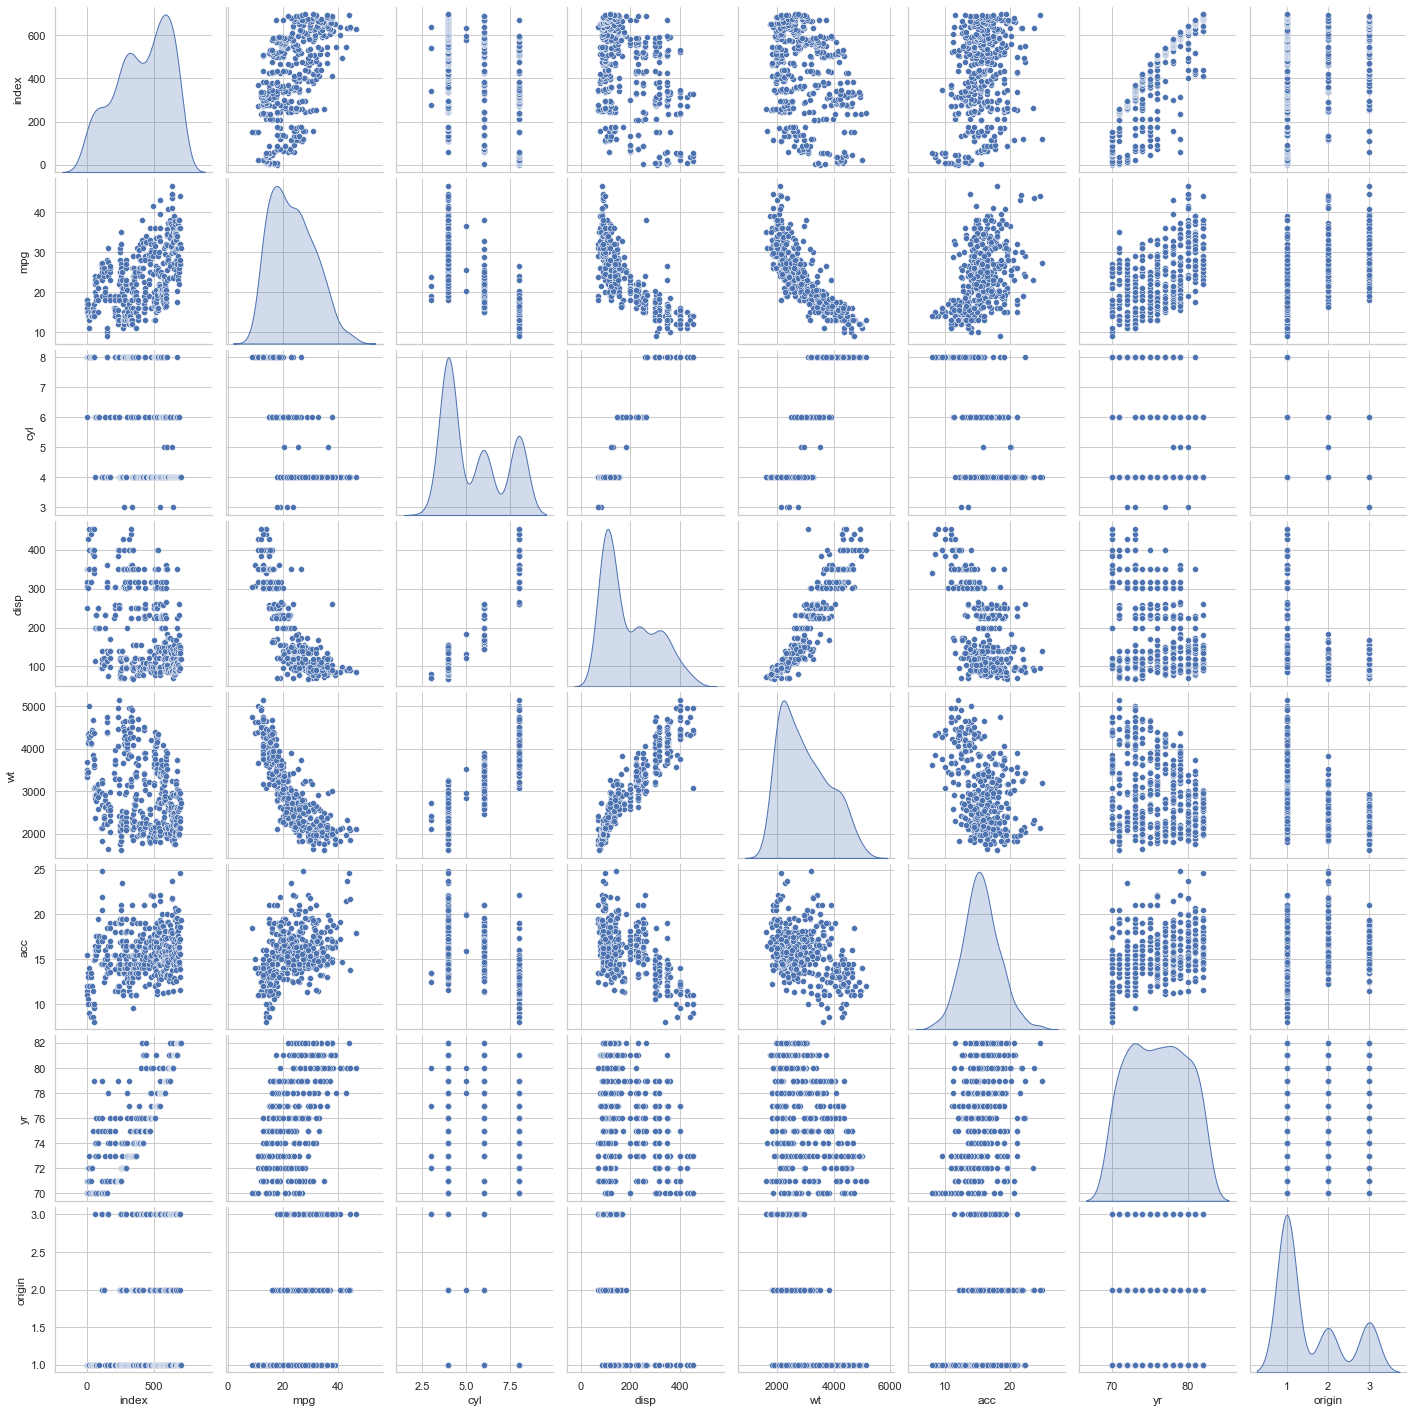

In [267]:
sns.pairplot(data= merged_df, diag_kind= 'kde')                                                 #Answer

# 2. D) Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

<AxesSubplot:xlabel='wt', ylabel='disp'>

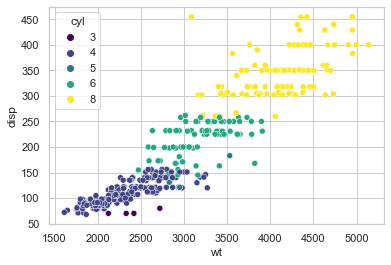

In [268]:
sns.scatterplot(x= merged_df['wt'], y= merged_df['disp'], data= merged_df, hue= merged_df['cyl'], palette= 'viridis')    #Answer

# 2. E) Share insights for Q2.d

In [441]:
#Answer
print('The data between wt and displacement based on no. of cylinders are slightly POSITIVELY LINEARLY correlated. As the weight and displacement increases, we can think that the no. of cylinders for the car is more')

The data between wt and displacement based on no. of cylinders are slightly POSITIVELY LINEARLY correlated. As the weight and displacement increases, we can think that the no. of cylinders for the car is more


# 2. F) Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’

<AxesSubplot:xlabel='wt', ylabel='mpg'>

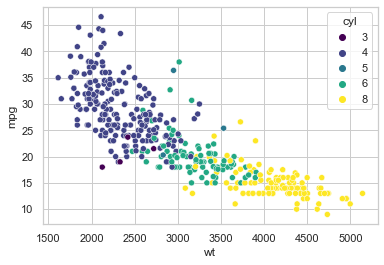

In [269]:
sns.scatterplot(x= merged_df['wt'], y= merged_df['mpg'], data= merged_df, hue= merged_df['cyl'], palette= 'viridis') #Answer

# 2. G) Share insights for Q2.f

In [443]:
print('The data between miles per gallon and weight of the car based on no. of cylinders are slightly NEGATIVELY LINEARLY correlated. As the no. of cylinders and weight increases, we can think that the miles per gallon/milage for the car will reduce')

The data between miles per gallon and weight of the car based on no. of cylinders are slightly NEGATIVELY LINEARLY correlated. As the no. of cylinders and weight increases, we can think that the miles per gallon/milage for the car will reduce


# 2. H) Check for unexpected values in all the features and datapoints with such values. 

In [270]:
merged_df.isna().sum()                           #Already under 1. c) steps have observed '?' values in the HP column and have replaced with Null values

index       0
car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [271]:
merged_df[merged_df['hp'].isnull() == True]

,index,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
35,87,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
61,171,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
340,638,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,2
345,643,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1
361,663,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,2
377,679,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,1


In [272]:
merged_df.replace(np.nan, merged_df['hp'].median(), inplace= True)              #Median imputation

In [293]:
merged_df.iloc[[35, 61, 340, 345, 361, 377]]

,index,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
35,87,ford maverick,21.0,6,200.0,93.5,2875,17.0,74,1
61,171,ford pinto,25.0,4,98.0,93.5,2046,19.0,71,1
340,638,renault lecar deluxe,40.9,4,85.0,93.5,1835,17.3,80,2
345,643,ford mustang cobra,23.6,4,140.0,93.5,2905,14.3,80,1
361,663,renault 18i,34.5,4,100.0,93.5,2320,15.8,81,2
377,679,amc concord dl,23.0,4,151.0,93.5,3035,20.5,82,1


# 3. A) Apply K-Means clustering for 2 to 10 clusters

In [349]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [274]:
merged_df.dtypes

index         int64
car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [287]:
merged_df = merged_df.astype({'hp' : 'float64'})

In [298]:
merged_df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [295]:
merged_df.drop(labels= 'index', axis=1 , inplace= True)

In [300]:
merged_df_col1 = merged_df['car_name']

In [303]:
merged_df.drop(labels= 'car_name', axis=1, inplace= True)

In [421]:
merged_df.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1
397,31.0,4,119.0,82.0,2720,19.4,82,1


In [305]:
merged_df_scaled = merged_df.apply(zscore)                           

In [306]:
merged_df_scaled.head()                                   #Scaling thedata

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145
1,-0.834543,0.320935,0.543257,-0.112746,0.423960,-0.024722,-1.356642,-0.715145
2,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145
3,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145
4,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145


In [307]:
k_means = KMeans(n_clusters = 2)                            #Answer                   Instantiating the model

In [308]:
k_means.fit(merged_df_scaled)                         #Fitting the scaled data

KMeans(n_clusters=2)

In [309]:
# Get the labels
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [310]:
k_means.inertia_

1588.5924567918626

In [311]:
wss= []

In [312]:
for i in range(2,11):                           #Elbow method
    KM = KMeans(n_clusters=i)
    KM.fit(merged_df_scaled)
    wss.append(KM.inertia_)

In [313]:
wss

[1588.5924567918626,
 1190.0436525504854,
 988.2208556383152,
 829.715787448879,
 750.7992019451884,
 680.8097648250778,
 637.6308679738677,
 604.6376270311947,
 555.1093181009529]

# 3. B) Plot a visual and find elbow point

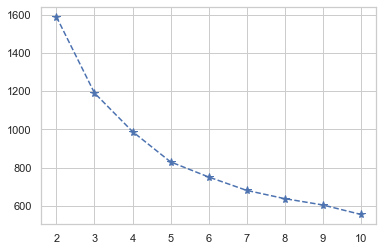

In [334]:
plt.plot(range(2,11), wss, marker= '*', markersize= 8,  linestyle= '--')


# 3. C) On the above visual, highlight which are the possible Elbow points

The ideal elbow points would be either 5 or 6 where there is lot of dip and then following there is not much dip


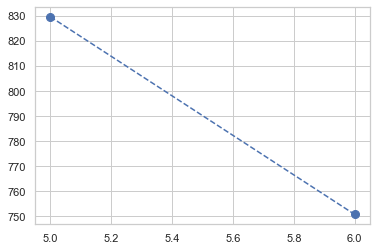

In [343]:
plt.plot(range(5,7), wss[3:5], marker= 'o', markersize= 8,  linestyle= '--')
print('The ideal elbow points would be either 5 or 6 where there is lot of dip and then following there is not much dip')

# 3. D) Train a K-means clustering model once again on the optimal number of clusters

# K MEANS with clusters K = 5

In [344]:
#Lets try K Means clustering with optimal no. of clusters 5 and 6
k_means_optimal_5 = KMeans(n_clusters = 5) 

In [345]:
k_means_optimal_5.fit(merged_df_scaled)
labels_5 = k_means_optimal_5.labels_

In [348]:
labels_5

array([1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 4, 4, 4, 4, 1, 1, 1, 1, 2, 2, 3, 2, 3, 2, 2, 2, 0, 4,
       0, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 2, 4, 4, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 2, 1, 1, 1, 2, 2, 2, 4, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 4, 4, 4, 3, 4, 1, 4, 1, 1, 2, 2,
       2, 2, 3, 2, 2, 0, 0, 2, 2, 3, 3, 2, 3, 2, 4, 4, 1, 1, 4, 4, 4, 4,
       4, 4, 1, 2, 3, 3, 3, 3, 0, 2, 2, 4, 2, 3, 3, 2, 0, 2, 1, 0, 0, 0,
       0, 0, 2, 3, 4, 4, 4, 4, 3, 2, 1, 4, 1, 1, 1, 1, 3, 0, 3, 0, 3, 4,
       1, 1, 4, 4, 0, 4, 4, 1, 1, 1, 1, 1, 2, 0, 3, 0, 0, 3, 3, 2, 2, 2,
       3, 0, 3, 3, 4, 4, 1, 1, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 1, 1,
       3, 0, 2, 0, 0, 3, 2, 4, 2, 4, 3, 3, 4, 4, 0,

In [350]:
silhouette_score(merged_df_scaled,labels_5)

0.33296973781495653

# K MEANS with clusters K = 6

In [351]:
k_means_optimal_6 = KMeans(n_clusters = 6) 

In [352]:
k_means_optimal_6.fit(merged_df_scaled)
labels_6 = k_means_optimal_6.labels_

In [353]:
labels_6

array([1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 0, 0, 3, 0,
       0, 3, 0, 3, 4, 4, 4, 4, 1, 1, 1, 1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 4,
       2, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 0, 4, 4, 0, 3, 3, 0, 3,
       3, 5, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 3, 0, 0, 0, 0, 3, 3, 0, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 0, 1, 1, 1, 3, 3, 3, 4, 3, 1, 1, 0, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 4, 4, 4, 5, 4, 1, 4, 1, 1, 3, 3,
       3, 3, 5, 3, 0, 0, 2, 3, 3, 5, 5, 3, 5, 3, 4, 4, 1, 1, 4, 4, 4, 4,
       4, 4, 1, 3, 3, 5, 5, 5, 0, 3, 3, 4, 3, 5, 5, 3, 2, 3, 1, 0, 2, 2,
       2, 0, 3, 5, 4, 4, 4, 4, 5, 3, 1, 4, 1, 1, 1, 1, 5, 2, 5, 2, 5, 4,
       1, 1, 4, 4, 2, 4, 4, 1, 1, 1, 1, 1, 3, 2, 5, 2, 2, 5, 5, 3, 3, 3,
       5, 2, 5, 5, 4, 4, 1, 1, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 1, 1,
       3, 2, 3, 2, 2, 3, 3, 4, 3, 4, 5, 5, 4, 4, 2,

In [354]:
silhouette_score(merged_df_scaled,labels_6)

0.3355387046096664

In [357]:
print('silhouette score is better for 6 clusters than for 5 clusters. However, there is not much increase from 5 and 6, so we will take K = 5')

silhouette score is better for 6 clusters than for 5 clusters. However, there is not much increase from 5 and 6, so we will take K = 5


# 3. E) Add a new feature in the DataFrame which will have labels based upon cluster value. 

In [358]:
merged_df_scaled['cluster_label5'] = labels_5

In [360]:
merged_df_scaled['cluster_label5'].value_counts()

1    94
2    84
4    81
3    72
0    67
Name: cluster_label5, dtype: int64

# 3. F) Plot a visual and color the datapoints based upon clusters

In [374]:
merged_df_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster_label5
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,1
1,-0.834543,0.320935,0.543257,-0.112746,0.423960,-0.024722,-1.356642,-0.715145,4
2,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,1
3,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,1
4,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,1


In [371]:
unique_labels

array([0, 1, 2, 3, 4])

In [393]:
from mpl_toolkits.mplot3d import Axes3D

In [396]:
k_means_plotting = KMeans(n_clusters= 5)

In [116]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'k',
                   2 : 'g',
                   3 : 'y',
                   4 : 'c'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in unique_labels]
plt.scatter(x= merged_df_scaled['mpg'], y= merged_df_scaled['cyl'],data= merged_df_scaled, c=label_color)
plt.show()

In [114]:
fig = plt.figure(figsize=(8, 6))                               # Answer
ax = Axes3D(fig, rect=[0, 0, .95, 1])
k_means_plotting.fit(merged_df_scaled)
ax.scatter(merged_df_scaled.iloc[:, 0], merged_df_scaled.iloc[:, 1], merged_df_scaled.iloc[:, 2],
           merged_df_scaled.iloc[:, 3], merged_df_scaled.iloc[:, 4],c= labels_5.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

# 3. G) Pass a new DataPoint and predict which cluster it belongs to.

In [430]:
data = {'mpg' : [16, 31.0] ,'cyl' : [9, 4], 'disp' : [280, 119.0],'hp' : [100, 82.0],'wt' : [3400, 2000], 'acc' : [9,19.4], 'yr' : [70, 82],
                        'origin' : [2, 1]}

In [431]:
new_dataframe = pd.DataFrame(data= data)

In [432]:
new_dataframe

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,16.0,9,280.0,100.0,3400,9.0,70,2
1,31.0,4,119.0,82.0,2000,19.4,82,1


In [433]:
k_means_optimal_6.predict(new_dataframe)

array([1, 1])

In [434]:
print('Here both the random points were beloning to cluster 1 ')

Here both the random points were beloning to cluster 1 


In [429]:
print('*****************************END OF PART A ********************************************')

*****************************END OF PART A ********************************************


# PART B

# 1. A) Read ‘vehicle.csv’ and save as DataFrame.

In [4]:
df_vehicle_2 = pd.read_csv('vehicle.csv')

In [5]:
df_vehicle_2.shape

(846, 19)

In [6]:
df_vehicle_2.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [7]:
df_vehicle_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [8]:
df_vehicle_2.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


# 1. B) Check percentage of missing values and impute with correct approach.

In [9]:
df_vehicle_2.isna().sum()   #There are lots of NULL values in the dataframe

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
# Answer

print(str((5/846) * 100) + ' percentage of null values in circularity feature')
print(str((4/846) * 100) + ' percentage of null values in distance circularity feature')
print(str((6/846) * 100) + ' percentage of null values radius_ratio feature')
print(str((2/846) * 100) + ' percentage of null values in pr.axis_aspect_ratio feature')
print(str((1/846) * 100) + ' percentage of null values in scatter_ratio feature')
print(str((1/846) * 100) + ' percentage of null values in elongatedness feature')
print(str((3/846) * 100) + ' percentage of null values in pr.axis_rectangularity feature')
print(str((3/846) * 100) + ' percentage of null values in scaled_variance feature')
print(str((2/846) * 100) + ' percentage of null values in scaled_variance.1 feature')
print(str((2/846) * 100) + ' percentage of null values in scaled_radius_of_gyration feature')
print(str((4/846) * 100) + ' percentage of null values in scaled_radius_of_gyration.1 feature')
print(str((6/846) * 100) + ' percentage of null values in skewness_about feature')
print(str((1/846) * 100) + ' percentage of null values in skewness_about.1 feature')
print(str((1/846) * 100) + ' percentage of null values in skewness_about.2 feature')

0.5910165484633569 percentage of null values in circularity feature
0.4728132387706856 percentage of null values in distance circularity feature
0.7092198581560284 percentage of null values radius_ratio feature
0.2364066193853428 percentage of null values in pr.axis_aspect_ratio feature
0.1182033096926714 percentage of null values in scatter_ratio feature
0.1182033096926714 percentage of null values in elongatedness feature
0.3546099290780142 percentage of null values in pr.axis_rectangularity feature
0.3546099290780142 percentage of null values in scaled_variance feature
0.2364066193853428 percentage of null values in scaled_variance.1 feature
0.2364066193853428 percentage of null values in scaled_radius_of_gyration feature
0.4728132387706856 percentage of null values in scaled_radius_of_gyration.1 feature
0.7092198581560284 percentage of null values in skewness_about feature
0.1182033096926714 percentage of null values in skewness_about.1 feature
0.1182033096926714 percentage of null

In [11]:
df_vehicle_2.describe().T 

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [12]:
df_vehicle_2[df_vehicle_2.isna().any(axis=1)]               #All these rows have NULL values

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193,car
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,NaN,2.0,3.0,180.0,185,car
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus


In [13]:
df_vehicle_2['circularity'].fillna(df_vehicle_2['circularity'].mean(), inplace= True)                   # Answer - Mean Imputation to NULL values

In [14]:
df_vehicle_2['distance_circularity'].fillna(df_vehicle_2['distance_circularity'].mean(), inplace= True)

In [15]:
df_vehicle_2['radius_ratio'].fillna(df_vehicle_2['radius_ratio'].mean(), inplace= True)

In [16]:
df_vehicle_2['pr.axis_aspect_ratio'].fillna(df_vehicle_2['pr.axis_aspect_ratio'].mean(), inplace= True)

In [17]:
df_vehicle_2['scatter_ratio'].fillna(df_vehicle_2['scatter_ratio'].mean(), inplace= True) 

In [18]:
df_vehicle_2['elongatedness'].fillna(df_vehicle_2['elongatedness'].mean(), inplace= True)  

In [19]:
df_vehicle_2['pr.axis_rectangularity'].fillna(df_vehicle_2['pr.axis_rectangularity'].mean(), inplace= True)  

In [20]:
df_vehicle_2['scaled_variance'].fillna(df_vehicle_2['scaled_variance'].mean(), inplace= True)  

In [21]:
df_vehicle_2['scaled_variance.1'].fillna(df_vehicle_2['scaled_variance.1'].mean(), inplace= True)  

In [22]:
df_vehicle_2['scaled_radius_of_gyration'].fillna(df_vehicle_2['scaled_radius_of_gyration'].mean(), inplace= True)  

In [23]:
df_vehicle_2['scaled_radius_of_gyration.1'].fillna(df_vehicle_2['scaled_radius_of_gyration.1'].mean(), inplace= True)  

In [24]:
df_vehicle_2['skewness_about'].fillna(df_vehicle_2['skewness_about'].mean(), inplace= True)  

In [25]:
df_vehicle_2['skewness_about.1'].fillna(df_vehicle_2['skewness_about.1'].mean(), inplace= True)  

In [26]:
df_vehicle_2['skewness_about.2'].fillna(df_vehicle_2['skewness_about.2'].mean(), inplace= True)  

In [27]:
df_vehicle_2[df_vehicle_2.isna().any(axis=1)] 

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


In [28]:
df_vehicle_2.isna().sum()                       #No more null values

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# 1. C) Visualize a Pie-chart and print percentage of values for variable ‘class’.

In [29]:
df_vehicle_2['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [30]:
feature_type = df_vehicle_2.groupby('class').agg('count')
feature_labels = feature_type.compactness.sort_values().index
feature_counts = feature_type.compactness.sort_values()

In [31]:
feature_counts

class
van    199
bus    218
car    429
Name: compactness, dtype: int64

In [32]:
feature_type

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
car,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
van,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199


In [33]:
feature_labels

Index(['van', 'bus', 'car'], dtype='object', name='class')

In [34]:
from matplotlib.gridspec import GridSpec

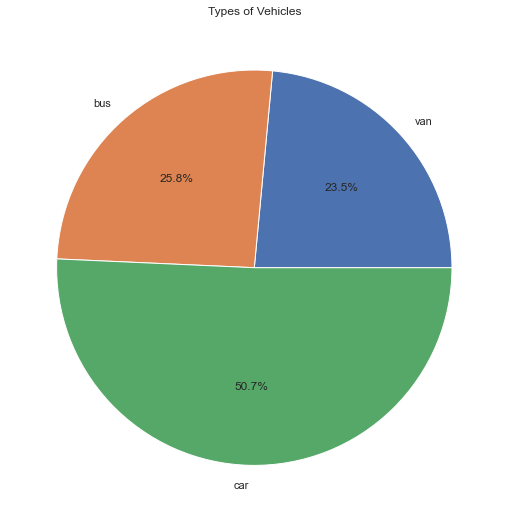

In [35]:
plt.figure(1, figsize=(35,20))                                               # Answer
the_grid = GridSpec(2, 2)
# cmap = plt.get_cmap('Accent')       
title_categorical_column_set = {'class' : 'Types of Vehicles'}
                
plt.subplot(the_grid[0, 1], aspect=1, title= title_categorical_column_set['class'])
type_feature = plt.pie(feature_counts, labels= feature_labels, autopct='%1.1f%%')
plt.show()  

# 1. D) Check for duplicate rows in the data and impute with correct approach.

In [36]:
df_vehicle_2.duplicated().sum()                        # Answer     No duplicates present in the dataframe

0

# 2. A) Split data into X and Y. [Train and Test optional]

In [37]:
X = df_vehicle_2.drop(labels= ['class'], axis= 1)             # Answer
y = df_vehicle_2['class']

In [38]:
X.head(3)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196


In [39]:
y.head(3)

0    van
1    van
2    car
Name: class, dtype: object

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 1 )    #Answer

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(676, 18)
(170, 18)
(676,)
(170,)


# 2. B) Standardize the Data.

In [42]:
X_train_scaled = X_train.apply(zscore)                     # Answer
X_test_scaled = X_test.apply(zscore)

In [43]:
X_train_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
135,-0.581861,0.341923,0.041768,4.503410,8.714250,8.151668,-0.343491,0.278409,-0.238333,1.033734,1.247643,-0.440553,0.012861,3.159603,-1.296586,0.159760,-0.798211,-0.216177
223,-1.550674,-0.149218,-0.650475,-0.894579,-0.214160,-0.541322,-0.493029,0.405914,-0.622167,-0.150562,-0.291034,-0.535975,0.074022,1.090092,-1.089484,0.270369,-1.125542,-1.280920
388,0.023647,0.341923,0.167631,4.827879,9.325785,8.358643,-0.433214,0.278409,-0.622167,0.476418,4.105186,-0.496684,0.349248,8.074692,1.188632,-0.393283,-0.143551,0.050008
134,0.992460,1.487919,1.111599,-0.186646,-1.070309,0.286582,1.301428,-1.251642,1.297003,1.730378,0.933627,1.271440,0.777378,0.443370,1.188632,1.597672,-0.307216,-0.083085
619,0.386952,1.651633,0.859874,0.019835,-0.948002,0.286582,1.391151,-1.251642,1.297003,1.730378,0.933627,1.361250,1.297249,0.314026,-1.296586,-0.946326,-0.798211,-0.349270


In [44]:
X_test_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
693,-0.392245,0.241682,-0.412779,-1.095461,-0.976121,0.746112,-0.205616,0.209298,-0.171350,0.904910,-0.450286,-0.347792,-0.007952,0.805530,-1.314555,0.380154,-1.125753,-0.515369
375,1.953960,1.208411,0.916105,0.701402,-0.518008,-1.244635,1.887296,-1.622059,1.823818,0.705986,2.609413,2.068004,1.448109,1.603550,-1.314555,0.735243,-0.331653,-1.359151
185,0.842600,-0.563925,-0.412779,1.214791,1.467149,-0.960242,0.294184,-0.706380,0.227684,-0.620176,0.615452,0.305126,-0.641023,0.007511,0.043362,0.735243,1.256546,0.187783
464,0.842600,0.725047,-0.080558,1.246878,1.314444,-0.675850,0.512846,-0.837192,0.227684,0.573370,0.684210,0.530679,0.846692,0.167115,-0.732590,0.025065,1.415366,0.469044
709,0.225178,-0.402804,0.982549,0.958096,0.550923,0.177327,0.356659,-0.575569,0.227684,-0.421251,0.443559,0.275448,-0.704330,-0.790509,-1.120567,1.918872,0.621266,0.609674


# 3. A) Train a base Classification model using SVM¶

In [45]:
from sklearn.svm import SVC

In [46]:
svm2 = SVC(gamma=0.025, C=3)

In [47]:
svm2.fit(X_train_scaled, y_train)                       # Answer

SVC(C=3, gamma=0.025)

In [48]:
svm2_predictions = svm2.predict(X_test_scaled)

# 3. B) Print Classification metrics for train data.

In [49]:
svm2.score(X_train_scaled, y_train) # Answer   - There is no overfitting tin the model. We got good scores with both train and test scores

0.9792899408284024

In [50]:
svm2.score(X_test_scaled, y_test)

0.9705882352941176

In [51]:
print(confusion_matrix(y_test, svm2_predictions))                                                
print('\n')
print(classification_report(y_test, svm2_predictions))
print('\n')
print('We got 97% accuracy with good average 98% recall and average 96% precision')

[[37  0  0]
 [ 2 86  2]
 [ 0  1 42]]


              precision    recall  f1-score   support

         bus       0.95      1.00      0.97        37
         car       0.99      0.96      0.97        90
         van       0.95      0.98      0.97        43

    accuracy                           0.97       170
   macro avg       0.96      0.98      0.97       170
weighted avg       0.97      0.97      0.97       170



We got 97% accuracy with good average 98% recall and average 96% precision


# 3. C) Apply PCA on the data with 10 components

In [52]:
from sklearn.decomposition import PCA

In [54]:
X_scaled_2 = X.apply(zscore)

In [55]:
X_scaled_2.shape

(846, 18)

In [56]:
X_scaled_2.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056545,0.272965,1.310206,0.311542,-0.208038,0.136580,-0.225160,0.758332,-0.403077,-0.343028,0.285618,-0.327938,-0.074340,0.380665,-0.312193,0.183957
1,-0.325470,-0.624564,0.120112,-0.835442,-0.593962,0.094079,-0.599893,0.520853,-0.611739,-0.344578,-0.594546,-0.620879,-0.513719,-0.059987,0.537873,0.156589,0.013088,0.452977
2,1.254193,0.843549,1.518571,1.201630,0.548539,0.311542,1.148382,-1.144331,0.934576,0.689401,1.096764,1.108603,1.392391,0.073989,1.558230,-0.403603,-0.149552,0.049447
3,-0.082445,-0.624564,-0.007021,-0.296217,0.167705,0.094079,-0.750606,0.648945,-0.611739,-0.344578,-0.913661,-0.739958,-1.466773,-1.265769,-0.074340,-0.291565,1.639494,1.529056
4,-1.054545,-0.135193,-0.769817,1.081803,5.245485,9.444962,-0.599893,0.520853,-0.611739,-0.275646,1.671171,-0.649231,0.408593,7.308682,0.537873,-0.179527,-1.450677,-1.699181


In [57]:
covMatrix = np.cov(X_scaled_2,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948

In [58]:
pca10 = PCA(n_components= 10)

In [59]:
pca10.fit(X_scaled_2)

PCA(n_components=10)

In [60]:
pca10.score(X_scaled_2, y)

-9.590522280550665

In [61]:
print(pca10.explained_variance_)

[9.40828822 3.01605477 1.90347881 1.18027268 0.91717407 0.53927982
 0.35856646 0.22166173 0.16003619 0.09171409]


In [62]:
print(pca10.components_)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [63]:
print(pca10.explained_variance_ratio_)

[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458
 0.01989681 0.01229998 0.00888039 0.0050892 ]


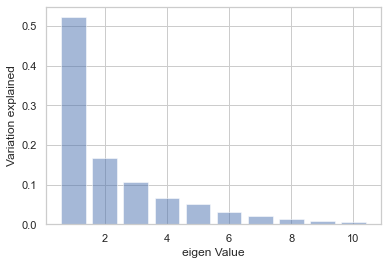

In [64]:
plt.bar(list(range(1,11)),pca10.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

# 3. D) Visualize Cumulative Variance Explained with Number of Components.¶

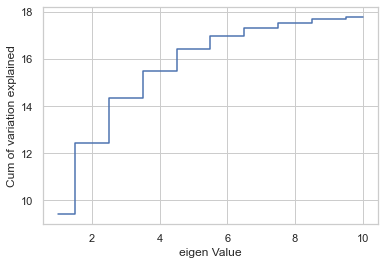

In [65]:
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

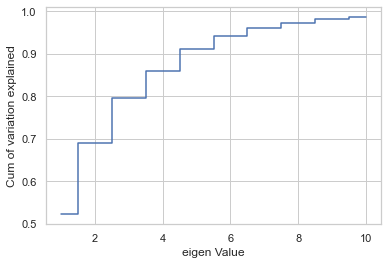

In [66]:
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [67]:
print('We can observe that most of the information/cumulative variance explained is around eigen value 5 or 6')

We can observe that most of the information/cumulative variance explained is around eigen value 5 or 6


# 3. E) Draw a horizontal line on the above plot to highlight the threshold of 90%.

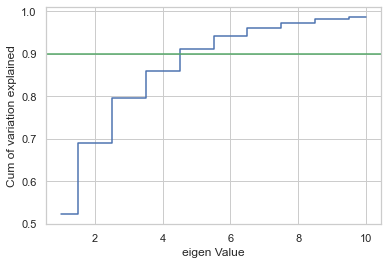

In [68]:
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y=0.90, color='g', linestyle='-')      # The line cuts between principal components/eigen values 4 and 5         
plt.show()

# 3. F) Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. DIMENSIONALITY REDUCTION - Now lets select minimum components. By seeing above plot we can choose 6 dimensions which explains more than 90% of variation in the data

In [69]:
pca6 = PCA(n_components= 6)

In [70]:
pca6.fit(X_scaled_2)

PCA(n_components=6)

In [71]:
print(pca6.components_)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [72]:
print(pca6.explained_variance_)

[9.40828822 3.01605477 1.90347881 1.18027268 0.91717407 0.53927982]


In [73]:
print(pca6.explained_variance_ratio_)

[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458]


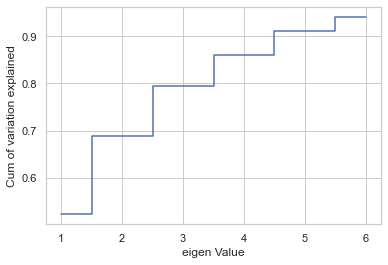

In [74]:
plt.step(list(range(1,7)),np.cumsum(pca6.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [75]:
Xpca6 = pca6.transform(X_scaled_2)

In [76]:
pca6

PCA(n_components=6)

In [77]:
Xpca6

array([[ 3.32393198e-01, -2.18638382e-01,  1.00128619e+00,
         1.77327855e-01,  7.91062378e-02, -7.54813578e-01],
       [-1.59374091e+00, -4.20549398e-01, -3.69264301e-01,
         2.33484079e-01,  6.93397240e-01, -5.19073099e-01],
       [ 3.76753509e+00,  1.95040767e-01,  8.82372311e-02,
         1.20312936e+00,  7.30906518e-01,  7.05376869e-01],
       ...,
       [ 4.80780979e+00, -1.82373823e-03,  5.32772800e-01,
         2.95987951e-01, -1.34473735e+00, -2.19629918e-01],
       [-3.29572788e+00, -1.00880341e+00, -3.57467658e-01,
        -1.93324092e+00,  4.30752761e-02, -4.03456799e-01],
       [-4.76673461e+00,  3.34686477e-01, -5.68739264e-01,
        -1.22499022e+00, -5.42871257e-02, -3.36467837e-01]])

In [78]:
tranformed_componenets = pd.DataFrame(Xpca6)

In [79]:
tranformed_componenets.head()

,0,1,2,3,4,5
0,0.332393,-0.218638,1.001286,0.177328,0.079106,-0.754814
1,-1.593741,-0.420549,-0.369264,0.233484,0.693397,-0.519073
2,3.767535,0.195041,0.088237,1.203129,0.730907,0.705377
3,-1.740753,-2.829579,0.109176,0.377522,-0.363483,-0.487863
4,0.555239,4.757557,11.703588,0.145068,3.257651,-0.211649


# 3. G) Train SVM model on components selected from above step.

In [80]:
SVM_PCA = SVC(gamma=0.025, C=3)

In [81]:
SVM_PCA.fit(Xpca6, y)

SVC(C=3, gamma=0.025)

# 3. H) Print Classification metrics for train data of above model and share insights

In [82]:
SVM_PCA.score(Xpca6, y)

0.8900709219858156

In [83]:
print('We got almost 90% explainable score as it is in-sample data')

We got almost 90% explainable score as it is in-sample data


# 4. A) Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
SVM_out_of_components = SVC(gamma=0.025, C=3)

In [86]:
SVM_out_of_components.fit(X_train_scaled,y_train )

SVC(C=3, gamma=0.025)

In [87]:
SVM_out_of_components.score(X_train_scaled, y_train)

0.9792899408284024

In [88]:
SVM_out_of_components.score(X_test_scaled, y_test)

0.9705882352941176

In [89]:
print('Both train and Test scores are good ')

Both train and Test scores are good 


In [90]:
SVM_out_of_components_tuning_C = [0.01, 0.1, 1, 10, 100, 1000 ]
SVM_out_of_components_tuning_gamma = [1, 0.1, 0.001, 0.0001, 0.00001]

In [91]:
SVM_out_of_components_tuning_hyperparameters = dict(gamma= SVM_out_of_components_tuning_gamma, C= SVM_out_of_components_tuning_C)

In [92]:
SVM_out_of_components_tuning_hyperparameters

{'gamma': [1, 0.1, 0.001, 0.0001, 1e-05], 'C': [0.01, 0.1, 1, 10, 100, 1000]}

In [93]:
SVM_out_of_components_tuning = SVC()

In [94]:
SVM_out_of_components_tuning_GS_classifier = GridSearchCV(SVM_out_of_components_tuning, SVM_out_of_components_tuning_hyperparameters, cv= 5)

In [95]:
SVM_out_of_components_tuning_GS_classifier

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]})

In [96]:
SVM_out_of_components_best_model = SVM_out_of_components_tuning_GS_classifier.fit(X_train_scaled, y_train)

In [97]:
SVM_out_of_components_best_model

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]})

In [98]:
df_SVM_out_of_components_best_model_results = pd.DataFrame(SVM_out_of_components_best_model.cv_results_)

In [99]:
df_SVM_out_of_components_best_model_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040185,0.009170,0.016118,0.001005,0.01,1,"{'C': 0.01, 'gamma': 1}",0.5,0.496296,0.503704,0.503704,0.503704,0.501481,0.002963,20
1,0.024612,0.006911,0.011573,0.006055,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.5,0.496296,0.503704,0.503704,0.503704,0.501481,0.002963,20
2,0.021772,0.011042,0.011576,0.006057,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.5,0.496296,0.503704,0.503704,0.503704,0.501481,0.002963,20
3,0.031304,0.006991,0.007595,0.006212,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",0.5,0.496296,0.503704,0.503704,0.503704,0.501481,0.002963,20
4,0.025182,0.000743,0.012398,0.000798,0.01,1e-05,"{'C': 0.01, 'gamma': 1e-05}",0.5,0.496296,0.503704,0.503704,0.503704,0.501481,0.002963,20


In [100]:
df_SVM_out_of_components_best_model_results[['param_gamma','param_C','params','mean_test_score']]

,param_gamma,param_C,params,mean_test_score
0,1,0.01,"{'C': 0.01, 'gamma': 1}",0.501481
1,0.1,0.01,"{'C': 0.01, 'gamma': 0.1}",0.501481
2,0.001,0.01,"{'C': 0.01, 'gamma': 0.001}",0.501481
3,0.0001,0.01,"{'C': 0.01, 'gamma': 0.0001}",0.501481
4,1e-05,0.01,"{'C': 0.01, 'gamma': 1e-05}",0.501481
5,1,0.1,"{'C': 0.1, 'gamma': 1}",0.502963
6,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.832810
7,0.001,0.1,"{'C': 0.1, 'gamma': 0.001}",0.501481
8,0.0001,0.1,"{'C': 0.1, 'gamma': 0.0001}",0.501481
9,1e-05,0.1,"{'C': 0.1, 'gamma': 1e-05}",0.501481


# 4. B) Share best Parameters observed from above step.

In [101]:
print(SVM_out_of_components_best_model.best_estimator_)
print('\n')
print(SVM_out_of_components_best_model.get_params)
print('\n')
print(SVM_out_of_components_best_model.best_score_)

SVC(C=10, gamma=0.1)


<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]})>


0.9704575163398694


# Now we will use the new parameters gamma and C to test the final model metrics - gamma = 0.1, C = 10 as the model best test score for these values

In [102]:
SVM_out_of_components_FINAL_MODEL = SVC(gamma= 0.1, C= 10 )

In [103]:
SVM_out_of_components_FINAL_MODEL.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.1)

In [104]:
SVM_out_of_components_FINAL_MODEL_predictions = SVM_out_of_components_FINAL_MODEL.predict(X_test_scaled)

In [105]:
SVM_out_of_components_FINAL_MODEL_predictions

array(['van', 'bus', 'bus', 'bus', 'car', 'car', 'van', 'van', 'van',
       'van', 'van', 'van', 'bus', 'car', 'bus', 'car', 'van', 'bus',
       'car', 'bus', 'car', 'car', 'car', 'car', 'van', 'van', 'bus',
       'car', 'car', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'bus', 'car', 'bus', 'bus', 'car', 'van', 'van', 'car', 'car',
       'van', 'car', 'car', 'car', 'car', 'car', 'car', 'bus', 'car',
       'car', 'van', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'van', 'bus', 'car', 'car', 'car', 'car', 'bus', 'car', 'van',
       'car', 'van', 'bus', 'car', 'car', 'car', 'van', 'car', 'car',
       'van', 'car', 'car', 'bus', 'car', 'van', 'car', 'bus', 'bus',
       'car', 'bus', 'van', 'van', 'van', 'van', 'bus', 'bus', 'bus',
       'car', 'car', 'car', 'car', 'van', 'van', 'car', 'car', 'car',
       'car', 'car', 'car', 'bus', 'car', 'car', 'car', 'van', 'car',
       'van', 'van', 'car', 'car', 'van', 'van', 'car', 'van', 'car',
       'van', 'car',

# 4. C) Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [106]:
SVM_out_of_components_FINAL_MODEL.score(X_train_scaled, y_train)

0.9985207100591716

In [107]:
SVM_out_of_components_FINAL_MODEL.score(X_test_scaled, y_test)

0.9705882352941176

In [108]:
print(confusion_matrix(y_test, SVM_out_of_components_FINAL_MODEL_predictions))                           # Metrics
print('\n')
print(classification_report(y_test, SVM_out_of_components_FINAL_MODEL_predictions))
print('\n')


[[37  0  0]
 [ 1 87  2]
 [ 0  2 41]]


              precision    recall  f1-score   support

         bus       0.97      1.00      0.99        37
         car       0.98      0.97      0.97        90
         van       0.95      0.95      0.95        43

    accuracy                           0.97       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.97      0.97      0.97       170





In [109]:
print('In SVM using principal components we got 90 % score')
print('\n')
print('In SVM out of components Final model, using GridSearch by changing parameters  we  got +7% accuracy which is 97% accuracy. Also, 95% Precision & 95% Recall')
print('\n')

In SVM using principal components we got 90 % score


In SVM out of components Final model, using GridSearch by changing parameters  we  got +7% accuracy which is 97% accuracy. Also, 95% Precision & 95% Recall




# 5. A) Explain pre-requisite/assumptions of PCA.

In [111]:
print('PCA thinks the relationship between all observed variables should be linear')
print('All variables should be assessed on an interval or ratio level of measurement.')

PCA thinks the relationship between all observed variables should be linear
All variables should be assessed on an interval or ratio level of measurement.


# 5. B) Explain advantages and limitations of PCA

In [112]:
print('******* ADVANTAGES *******')
print('1. Computational time is faster')
print('2. In this case we were able to get good accuracy score even after reducing the dimensions. Curse of dimensionality is reduced')
print('3. Reduces no. of independent variables/columsn/dimensions')
print('4. It reduces no. of variables and creates new few variables from old variables which are common in data ')
print('\n')
print('******* LIMITATIONS *******')
print('1. In case if we drop any varibales, we might lose some information from that variable')
print('2. After PCA model is instantiated, the data is not interpretable. cannot be understandable')
print('3. Data should be standardized before applying the model')

******* ADVANTAGES *******
1. Computational time is faster
2. In this case we were able to get good accuracy score even after reducing the dimensions. Curse of dimensionality is reduced
3. Reduces no. of independent variables/columsn/dimensions
4. It reduces no. of variables and creates new few variables from old variables which are common in data 


******* LIMITATIONS *******
1. In case if we drop any varibales, we might lose some information from that variable
2. After PCA model is instantiated, the data is not interpretable. cannot be understandable
3. Data should be standardized before applying the model


In [113]:
print('******************************** END OF PART B ************************************')

******************************** END OF PART B ************************************
